In [59]:
from pycaret.classification import *
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('/home/antoine/gene_pheno_pred')
os.environ["CUDA_VISIBLE_DEVICES"]="1"


In [60]:
# Load training set
train = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-25_11-10-42_train.csv' , header=0)
test = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-25_11-10-42_test.csv' , header=0)
val = pd.read_csv('/home/antoine/gene_pheno_pred/ComplEx_2023-05-25_11-10-42_val.csv' , header=0)

# add column to identify train, test and val
train['set'] = 'train'
test['set'] = 'test'
val['set'] = 'val'

# Merge train, test and val
df = pd.concat([train, test, val], axis=0)
df = df[~(df['relation'] == 'no_link_known')] # Drop negatives
df

0         1         2         3         4         5         6  \
0      -0.034373  0.052990  0.069146 -0.007425  0.047442 -0.083339 -0.074493   
1      -0.018719  0.036862  0.034742  0.021447  0.024787 -0.033178 -0.044842   
4      -0.023017  0.016592  0.049542  0.028821 -0.028735 -0.035397 -0.042786   
5       0.029642  0.018673 -0.012335 -0.016866 -0.004746 -0.050861  0.003145   
6       0.055075  0.047973  0.065120 -0.020455 -0.051876 -0.058404 -0.041073   
...          ...       ...       ...       ...       ...       ...       ...   
234187 -0.084259  0.131885 -0.116933 -0.082694 -0.093921  0.121130  0.103481   
234189  0.124076  0.129790 -0.105041 -0.135313 -0.037094  0.149751  0.112195   
234192  0.054770 -0.052268  0.064768 -0.063158 -0.069956 -0.066765 -0.056419   
234194 -0.032269  0.042926  0.051747 -0.007377  0.041330  0.025196 -0.039400   
234195  0.044005  0.029400 -0.027224  0.035761 -0.026798  0.024632  0.030963   

               7         8         9  ...       194       195       196  \
0       0.040815 -0.041191  0.047949  ... -0.294970  0.310747  0.301654   
1       0.035912 -0.043536  0.045556  ... -0.428440  0.323528 -0.489384   
4       0.034576 -0.035928  0.040613  ... -0.484678  0.477283 -0.489351   
5      -0.042841 -0.000894 -0.022414  ...  0.229488  0.229587  0.160065   
6       0.055518 -0.021014  0.061165  ...  0.248565 -0.153734  0.276072   
...          ...       ...       ...  ...       ...       ...       ...   
234187  0.060050 -0.123199 -0.115975  ... -0.030634  0.015492  0.035900   
234189  0.044554 -0.127283 -0.128038  ... -0.011369  0.020360  0.015167   
234192  0.058635  0.062441  0.066964  ... -0.007706 -0.041902  0.008547   
234194 -0.048995  0.014433  0.053791  ... -0.032296  0.026252  0.020020   
234195  0.030885 -0.020192  0.043974  ... -0.030020  0.034073  0.007598   

             197       198       199  \
0       0.309505 -0.287372  0.315604   
1       0.485992 -0.520290 -0.488257   
4       0.518109 -0.502757 -0.464765   
5       0.228351  0.229646  0.233833   
6       0.008684  0.198248 -0.269215   
...          ...       ...       ...   
234187 -0.001721  0.026670  0.038622   
234189  0.001206  0.022432  0.038319   
234192  0.031074  0.049211 -0.037520   
234194 -0.004574  0.020071 -0.000107   
234195  0.006755  0.003901  0.024246   

                                                     head  \
0                  https://wormbase.org/wbinter/000544216   
1                https://wormbase.org/wbdata/pheno-337115   
4                https://wormbase.org/wbdata/pheno-166767   
5       https://wormbase.org/species/c_elegans/gene/WB...   
6                   https://wormbase.org/wbdata/dev-53174   
...                                                   ...   
234187            https://wormbase.org/wbdata/pheno-14563   
234189              https://wormbase.org/wbdata/dev-47210   
234192            https://wormbase.org/wbdata/pheno-95315   
234194           https://wormbase.org/wbdata/pheno-151243   
234195         https://wormbase.org/wbdata/ortho_dis-6602   

                                               relation  \
0        http://semanticscience.org/resource/SIO_000628   
1        http://semanticscience.org/resource/SIO_000281   
4        http://semanticscience.org/resource/SIO_000281   
5       http://www.w3.org/1999/02/22-rdf-syntax-ns#type   
6           http://www.semanticweb.org/needed-terms#001   
...                                                 ...   
234187      http://www.semanticweb.org/needed-terms#001   
234189      http://www.semanticweb.org/needed-terms#004   
234192      http://www.semanticweb.org/needed-terms#001   
234194      http://www.semanticweb.org/needed-terms#001   
234195      http://www.semanticweb.org/needed-terms#009   

                                                     tail    set  
0          http://semanticscience.org/resource/SIO_010043  train  
1       https://wormbase.org/species/all/phenotype/WBP...  train  
4       https://wormbase.org/

In [61]:
# split combined embeddings into individual nodes
df1 = df.iloc[:, :100] # Head node
df2 = df.iloc[:, 100:200] # Tail node

# Add column to identify head and tail node
df1['node'] = df['head']
df2['node'] = df['tail']
df1['set'] = df['set']
df2['set'] = df['set']

# drop indexes
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# rename columns of df2 to be the same as df1
df2.columns = df1.columns

# merge the two dataframes
df = pd.concat([df1, df2], axis=0)

# Count the number of times a node appears in the dataset and add the count as a column
df['connectivity'] = df.groupby('node')['node'].transform('count')

df

0         1         2         3         4         5         6  \
0       -0.034373  0.052990  0.069146 -0.007425  0.047442 -0.083339 -0.074493   
1       -0.018719  0.036862  0.034742  0.021447  0.024787 -0.033178 -0.044842   
2       -0.023017  0.016592  0.049542  0.028821 -0.028735 -0.035397 -0.042786   
3        0.029642  0.018673 -0.012335 -0.016866 -0.004746 -0.050861  0.003145   
4        0.055075  0.047973  0.065120 -0.020455 -0.051876 -0.058404 -0.041073   
...           ...       ...       ...       ...       ...       ...       ...   
1416263 -0.013021 -0.008154  0.038572 -0.027049  0.029632 -0.013112 -0.020252   
1416264 -0.003767 -0.032599  0.011294 -0.017213  0.026705 -0.016938 -0.025679   
1416265 -0.021220 -0.010449  0.049240 -0.029058 -0.037207  0.014409  0.029081   
1416266 -0.010331 -0.022953  0.023697 -0.016098  0.020154 -0.010594 -0.006593   
1416267  0.005315 -0.032046  0.012276 -0.024185  0.020964 -0.011805 -0.026177   

                7         8         9  ...        93        94        95  \
0        0.040815 -0.041191  0.047949  ...  0.060184  0.039854 -0.060941   
1        0.035912 -0.043536  0.045556  ...  0.043549  0.021640 -0.044829   
2        0.034576 -0.035928  0.040613  ...  0.047381 -0.009331  0.017041   
3       -0.042841 -0.000894 -0.022414  ...  0.032467 -0.040737 -0.027557   
4        0.055518 -0.021014  0.061165  ...  0.043174 -0.041354 -0.057606   
...           ...       ...       ...  ...       ...       ...       ...   
1416263 -0.042943  0.019490  0.038591  ...  0.031148 -0.030634  0.015492   
1416264 -0.051047  0.036963  0.045856  ...  0.017991 -0.011369  0.020360   
1416265 -0.050018 -0.026609  0.003105  ... -0.037117 -0.007706 -0.041902   
1416266 -0.040375  0.028746  0.038917  ...  0.022312 -0.032296  0.026252   
1416267 -0.046557  0.032270  0.030229  ...  0.043550 -0.030020  0.034073   

               96        97        98        99  \
0       -0.004433 -0.061820  0.065740  0.033293   
1       -0.040988 -0.044305  0.025428 -0.044634   
2       -0.034415 -0.039327  0.041585  0.009805   
3        0.048382 -0.056451 -0.021268 -0.017571   
4        0.050226 -0.059978 -0.041762 -0.026664   
...           ...       ...       ...       ...   
1416263  0.035900 -0.001721  0.026670  0.038622   
1416264  0.015167  0.001206  0.022432  0.038319   
1416265  0.008547  0.031074  0.049211 -0.037520   
1416266  0.020020 -0.004574  0.020071 -0.000107   
1416267  0.007598  0.006755  0.003901  0.024246   

                                                      node    set  \
0                   https://wormbase.org/wbinter/000544216  train   
1                 https://wormbase.org/wbdata/pheno-337115  train   
2                 https://wormbase.org/wbdata/pheno-166767  train   
3        https://wormbase.org/species/c_elegans/gene/WB...  train   
4                    https://wormbase.org/wbdata/dev-53174  train   
...                                                    ...    ...   
1416263  https://wormbase.org/species/c_elegans/gene/WB...    val   
1416264  https://wormbase.org/species/all/expr_pattern/...    val   
1416265  https://wormbase.org/species/c_elegans/gene/WB...    val   
1416266  https://wormbase.org/species/c_elegans/gene/WB...    val   
1416267         https://disease-ontology.org/?id=DOID:3748    val   

         connectivity  
0                   3  
1                   2  
2                   2  
3                   1  
4                   3  
...               ...  
1416263           177  
1416264            67  
1416265            61  
1416266            28  
1416267           121  

[2832536 rows x 103 columns]

In [62]:
# Drop duplicates
df_test = df[df['set'].isin(['val', 'test'])].copy()
df_test = df_test.drop_duplicates(subset=['node'])

df_train = df[df['set'].isin(['train'])].copy()
df_train = df.drop_duplicates(subset=['node'])

In [63]:
df_test

0         1         2         3         4         5         6  \
1182267 -0.250004 -0.183007  0.067989 -0.168242  0.004998  0.282481  0.209461   
1182268 -0.010823  0.029796  0.042514 -0.004681  0.033575  0.024810 -0.041484   
1182269 -0.044634 -0.053114  0.067501 -0.060379 -0.067939 -0.078998 -0.056945   
1182270 -0.026522 -0.004248  0.056049 -0.003745 -0.050826 -0.051418 -0.044056   
1182271  0.027563  0.000314  0.080442 -0.008287 -0.062370 -0.076064 -0.054517   
...           ...       ...       ...       ...       ...       ...       ...   
1415841 -0.005026 -0.019980  0.004126 -0.007590  0.026765  0.001841 -0.004865   
1415913 -0.029472 -0.033896  0.005377 -0.015354  0.031397 -0.007645 -0.023441   
1416107 -0.062583 -0.022250  0.018163 -0.092899 -0.062966 -0.102227  0.054518   
1416122  0.013170  0.032685  0.008149  0.002840 -0.009366 -0.035485 -0.013530   
1416182  0.039000  0.018229  0.003715 -0.033892 -0.024460 -0.014626  0.013052   

                7         8         9  ...        93        94        95  \
1182267 -0.181157 -0.052753  0.015105  ... -0.250761  0.146202 -0.235089   
1182268 -0.050770  0.015857  0.062599  ...  0.041843 -0.038645  0.008023   
1182269  0.022592  0.063044  0.070910  ...  0.055571  0.041292 -0.056598   
1182270 -0.042880 -0.014632  0.045736  ...  0.037553 -0.043582 -0.042722   
1182271  0.048947  0.059028  0.062446  ... -0.044442  0.031153 -0.066057   
...           ...       ...       ...  ...       ...       ...       ...   
1415841 -0.047251  0.022567  0.021989  ...  0.018085 -0.033973  0.016912   
1415913 -0.032437  0.026237  0.028017  ...  0.003263 -0.026983  0.031906   
1416107 -0.095433 -0.043623  0.023894  ... -0.082608 -0.095069 -0.059530   
1416122 -0.047466  0.023689  0.011245  ... -0.002096 -0.021348  0.000348   
1416182 -0.046042  0.029167  0.011592  ...  0.030959 -0.017824 -0.011595   

               96        97        98        99  \
1182267 -0.191921  0.291539 -0.103134  0.090758   
1182268  0.050701 -0.048857 -0.045970 -0.019809   
1182269  0.068891 -0.067276 -0.044581  0.039087   
1182270 -0.008790 -0.051604  0.022822  0.040879   
1182271  0.064013 -0.071783 -0.026688  0.071051   
...           ...       ...       ...       ...   
1415841  0.015342  0.006443  0.018996  0.037750   
1415913 -0.000749 -0.013017  0.027721  0.028531   
1416107 -0.034611  0.092053 -0.084288  0.104412   
1416122  0.033007 -0.018938  0.028634  0.021078   
1416182 -0.008417 -0.037255  0.031623 -0.006625   

                                                      node   set  connectivity  
1182267        https://wormbase.org/wbdata/ortho_dis-21093  test             2  
1182268           https://wormbase.org/wbdata/pheno-216806  test             2  
1182269             https://wormbase.org/wbinter/000551588  test             3  
1182270             https://wormbase.org/wbinter/000548033  test             3  
1182271             https://wormbase.org/wbinter/000560112  test             3  
...                                                    ...   ...           ...  
1415841  https://wormbase.org/species/all/expr_pattern/...   val             2  
1415913  https://wormbase.org/species/all/expr_pattern/...   val             9  
1416107  https://wormbase.org/species/c_elegans/gene/WB...   val             8  
1416122  https://wormbase.org/species/all/expr_pattern/...   val             3  
1416182  https://wormbase.org/species/c_elegans/gene/WB...   val             8  

[236485 rows x 103 columns]

In [64]:
df_train

0         1         2         3         4         5         6  \
0       -0.034373  0.052990  0.069146 -0.007425  0.047442 -0.083339 -0.074493   
1       -0.018719  0.036862  0.034742  0.021447  0.024787 -0.033178 -0.044842   
2       -0.023017  0.016592  0.049542  0.028821 -0.028735 -0.035397 -0.042786   
3        0.029642  0.018673 -0.012335 -0.016866 -0.004746 -0.050861  0.003145   
4        0.055075  0.047973  0.065120 -0.020455 -0.051876 -0.058404 -0.041073   
...           ...       ...       ...       ...       ...       ...       ...   
1182167 -0.026946 -0.031911  0.011371 -0.017925  0.035431  0.012516 -0.021405   
1182182 -0.015654 -0.017735  0.018679 -0.021041  0.017345  0.005219 -0.002877   
1182229  0.005967 -0.013435  0.019581 -0.030598  0.024324 -0.021552 -0.016180   
1182239 -0.001136 -0.025574  0.051894 -0.014279 -0.008412 -0.008528  0.014054   
1182251  0.033472 -0.008251  0.016507 -0.019832  0.010270  0.010269  0.024310   

                7         8         9  ...        93        94        95  \
0        0.040815 -0.041191  0.047949  ...  0.060184  0.039854 -0.060941   
1        0.035912 -0.043536  0.045556  ...  0.043549  0.021640 -0.044829   
2        0.034576 -0.035928  0.040613  ...  0.047381 -0.009331  0.017041   
3       -0.042841 -0.000894 -0.022414  ...  0.032467 -0.040737 -0.027557   
4        0.055518 -0.021014  0.061165  ...  0.043174 -0.041354 -0.057606   
...           ...       ...       ...  ...       ...       ...       ...   
1182167 -0.027902  0.022971  0.025046  ...  0.030701 -0.018401  0.011001   
1182182 -0.041804  0.035606  0.017348  ...  0.019189 -0.025605  0.026124   
1182229 -0.042710  0.022537  0.035215  ...  0.030397  0.004517  0.023930   
1182239  0.001554  0.009046  0.004767  ... -0.015386  0.018991  0.031264   
1182251 -0.028604  0.017729  0.025567  ...  0.029463 -0.036194 -0.027164   

               96        97        98        99  \
0       -0.004433 -0.061820  0.065740  0.033293   
1       -0.040988 -0.044305  0.025428 -0.044634   
2       -0.034415 -0.039327  0.041585  0.009805   
3        0.048382 -0.056451 -0.021268 -0.017571   
4        0.050226 -0.059978 -0.041762 -0.026664   
...           ...       ...       ...       ...   
1182167  0.013001 -0.002471  0.032278  0.016909   
1182182  0.006961  0.007905  0.017424  0.028221   
1182229 -0.002564 -0.016527  0.030614  0.021341   
1182239  0.044902 -0.003192 -0.022765 -0.009576   
1182251  0.016298 -0.038273  0.027699 -0.018937   

                                                      node    set  \
0                   https://wormbase.org/wbinter/000544216  train   
1                 https://wormbase.org/wbdata/pheno-337115  train   
2                 https://wormbase.org/wbdata/pheno-166767  train   
3        https://wormbase.org/species/c_elegans/gene/WB...  train   
4                    https://wormbase.org/wbdata/dev-53174  train   
...                                                    ...    ...   
1182167                                         21ur-10320  train   
1182182                                           21ur-297  train   
1182229                                          21ur-9219  train   
1182239                                             ins-12  train   
1182251                                              pbo-3  train   

         connectivity  
0                   3  
1                   2  
2                   2  
3                   1  
4                   3  
...               ...  
1182167             1  
1182182             1  
1182229             1  
1182239             1  
1182251             1  

[675845 rows x 103 columns]

In [66]:
df_merged = pd.concat([df_test, df_train], ignore_index=True)
df_merged

0         1         2         3         4         5         6  \
0      -0.250004 -0.183007  0.067989 -0.168242  0.004998  0.282481  0.209461   
1      -0.010823  0.029796  0.042514 -0.004681  0.033575  0.024810 -0.041484   
2      -0.044634 -0.053114  0.067501 -0.060379 -0.067939 -0.078998 -0.056945   
3      -0.026522 -0.004248  0.056049 -0.003745 -0.050826 -0.051418 -0.044056   
4       0.027563  0.000314  0.080442 -0.008287 -0.062370 -0.076064 -0.054517   
...          ...       ...       ...       ...       ...       ...       ...   
912325 -0.026946 -0.031911  0.011371 -0.017925  0.035431  0.012516 -0.021405   
912326 -0.015654 -0.017735  0.018679 -0.021041  0.017345  0.005219 -0.002877   
912327  0.005967 -0.013435  0.019581 -0.030598  0.024324 -0.021552 -0.016180   
912328 -0.001136 -0.025574  0.051894 -0.014279 -0.008412 -0.008528  0.014054   
912329  0.033472 -0.008251  0.016507 -0.019832  0.010270  0.010269  0.024310   

               7         8         9  ...        93        94        95  \
0      -0.181157 -0.052753  0.015105  ... -0.250761  0.146202 -0.235089   
1      -0.050770  0.015857  0.062599  ...  0.041843 -0.038645  0.008023   
2       0.022592  0.063044  0.070910  ...  0.055571  0.041292 -0.056598   
3      -0.042880 -0.014632  0.045736  ...  0.037553 -0.043582 -0.042722   
4       0.048947  0.059028  0.062446  ... -0.044442  0.031153 -0.066057   
...          ...       ...       ...  ...       ...       ...       ...   
912325 -0.027902  0.022971  0.025046  ...  0.030701 -0.018401  0.011001   
912326 -0.041804  0.035606  0.017348  ...  0.019189 -0.025605  0.026124   
912327 -0.042710  0.022537  0.035215  ...  0.030397  0.004517  0.023930   
912328  0.001554  0.009046  0.004767  ... -0.015386  0.018991  0.031264   
912329 -0.028604  0.017729  0.025567  ...  0.029463 -0.036194 -0.027164   

              96        97        98        99  \
0      -0.191921  0.291539 -0.103134  0.090758   
1       0.050701 -0.048857 -0.045970 -0.019809   
2       0.068891 -0.067276 -0.044581  0.039087   
3      -0.008790 -0.051604  0.022822  0.040879   
4       0.064013 -0.071783 -0.026688  0.071051   
...          ...       ...       ...       ...   
912325  0.013001 -0.002471  0.032278  0.016909   
912326  0.006961  0.007905  0.017424  0.028221   
912327 -0.002564 -0.016527  0.030614  0.021341   
912328  0.044902 -0.003192 -0.022765 -0.009576   
912329  0.016298 -0.038273  0.027699 -0.018937   

                                               node    set  connectivity  
0       https://wormbase.org/wbdata/ortho_dis-21093   test             2  
1          https://wormbase.org/wbdata/pheno-216806   test             2  
2            https://wormbase.org/wbinter/000551588   test             3  
3            https://wormbase.org/wbinter/000548033   test             3  
4            https://wormbase.org/wbinter/000560112   test             3  
...                                             ...    ...           ...  
912325                                   21ur-10320  train             1  
912326                                     21ur-297  train             1  
912327                                    21ur-9219  train             1  
912328                                       ins-12  train             1  
912329                                        pbo-3  train             1  

[912330 rows x 103 columns]

In [67]:
# Select only embeddings
df_tsne_num = df_merged.iloc[:, :100]

# Apply TSNE
import numpy as np
import pandas as pd
# Import TSNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [68]:
tsne = TSNE(n_components=2)  # Specify the number of components you want to keep
tsne_result = tsne.fit_transform(df_tsne_num)
df_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

In [69]:
# transform embedding into dataframe
df_tsne.columns = ['TSNE1', 'TSNE2']

df_tsne.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df_tsne['node'] = df_merged['node']
df_tsne['set'] = df_merged['set']
df_tsne['connectivity'] = df_merged['connectivity']

# Create a new column with the merged string excluding the last index
df_tsne['node_type'] = df_tsne['node'].apply(lambda x: '/'.join(x[:-1]))
df_tsne['node_type'] = df_tsne['node'].replace('', 'labels')

# Define the ranges and labels for the connectivity groups
ranges = [1, 5, 10, 100, 1000, 10000, float('inf')]
labels = ['[1-1]', '[2-5]', '[5-10]', '[11-100]', '[101-1000]', '[1001-10000]', '[10001+]']

# Create the 'grouped_connectivity' column
df_tsne['grouped_connectivity'] = pd.cut(df_tsne['connectivity'], bins=ranges, labels=labels, right=True)
df_tsne

TSNE1       TSNE2                                         node  \
0       119.675659   18.749762  https://wormbase.org/wbdata/ortho_dis-21093   
1       -27.145353  106.760506     https://wormbase.org/wbdata/pheno-216806   
2      -130.223373   39.671459       https://wormbase.org/wbinter/000551588   
3      -101.933884  -64.669289       https://wormbase.org/wbinter/000548033   
4      -126.548851   -6.409678       https://wormbase.org/wbinter/000560112   
...            ...         ...                                          ...   
912325   46.988419   69.087296                                   21ur-10320   
912326   51.501236   75.106873                                     21ur-297   
912327   41.914524   79.754448                                    21ur-9219   
912328   70.028419   56.555977                                       ins-12   
912329   -3.200288   53.182472                                        pbo-3   

          set  connectivity                                    node_type  \
0        test             2  https://wormbase.org/wbdata/ortho_dis-21093   
1        test             2     https://wormbase.org/wbdata/pheno-216806   
2        test             3       https://wormbase.org/wbinter/000551588   
3        test             3       https://wormbase.org/wbinter/000548033   
4        test             3       https://wormbase.org/wbinter/000560112   
...       ...           ...                                          ...   
912325  train             1                                   21ur-10320   
912326  train             1                                     21ur-297   
912327  train             1                                    21ur-9219   
912328  train             1                                       ins-12   
912329  train             1                                        pbo-3   

       grouped_connectivity  
0                     [2-5]  
1                     [2-5]  
2                     [2-5]  
3                     [2-5]  
4                     [2-5]  
...                     ...  
912325                [1-1]  
912326                [1-1]  
912327                [1-1]  
912328                [1-1]  
912329                [1-1]  

[912330 rows x 7 columns]

In [109]:
# Define the ranges and labels for the connectivity groups
ranges = [0, 1, 2, 3, 4, 5, 10, 100, 1000, 10000]
labels = ['[1]', '[2]', '[3]', '[4]', '[5]' '[6-10]', '[11-100]', '[101-1000]', '[1001-10000]', '10001+']

# Create the 'grouped_connectivity' column
df_tsne['grouped_connectivity'] = pd.cut(df_tsne['connectivity'], bins=ranges, labels=labels, right=True)
df_tsne

TSNE1       TSNE2                                         node  \
0       119.675659   18.749762  https://wormbase.org/wbdata/ortho_dis-21093   
1       -27.145353  106.760506     https://wormbase.org/wbdata/pheno-216806   
2      -130.223373   39.671459       https://wormbase.org/wbinter/000551588   
3      -101.933884  -64.669289       https://wormbase.org/wbinter/000548033   
4      -126.548851   -6.409678       https://wormbase.org/wbinter/000560112   
...            ...         ...                                          ...   
912325   46.988419   69.087296                                   21ur-10320   
912326   51.501236   75.106873                                     21ur-297   
912327   41.914524   79.754448                                    21ur-9219   
912328   70.028419   56.555977                                       ins-12   
912329   -3.200288   53.182472                                        pbo-3   

          set  connectivity                              node_type  \
0        test             2  https://wormbase.org/wbdata/ortho_dis   
1        test             2      https://wormbase.org/wbdata/pheno   
2        test             3           https://wormbase.org/wbinter   
3        test             3           https://wormbase.org/wbinter   
4        test             3           https://wormbase.org/wbinter   
...       ...           ...                                    ...   
912325  train             1                                 labels   
912326  train             1                                 labels   
912327  train             1                                 labels   
912328  train             1                                 labels   
912329  train             1                                 labels   

       grouped_connectivity  
0                       [2]  
1                       [2]  
2                       [3]  
3                       [3]  
4                       [3]  
...                     ...  
912325                  [1]  
912326                  [1]  
912327                  [1]  
912328                  [1]  
912329                  [1]  

[912330 rows x 7 columns]

In [70]:
df_tsne['set'] = df_tsne['set'].str.replace('val', 'test')

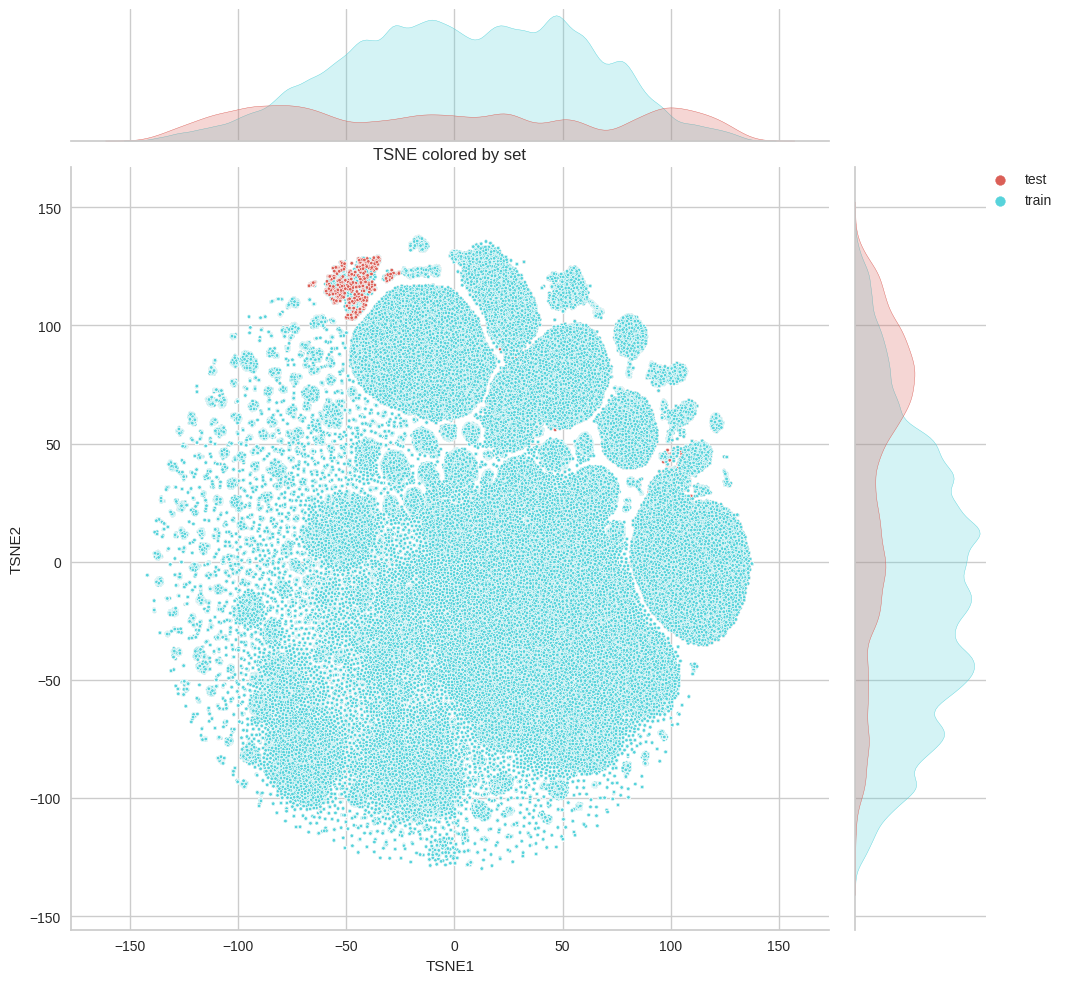

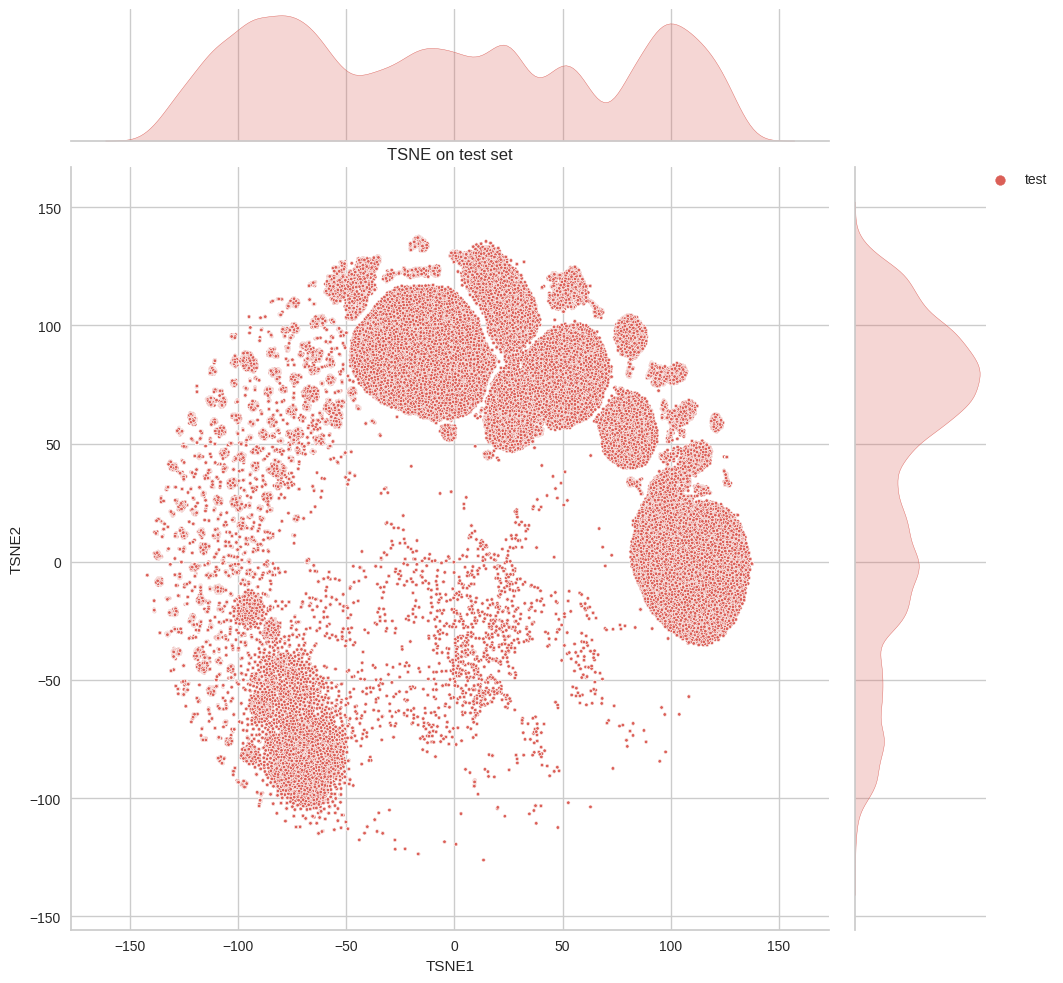

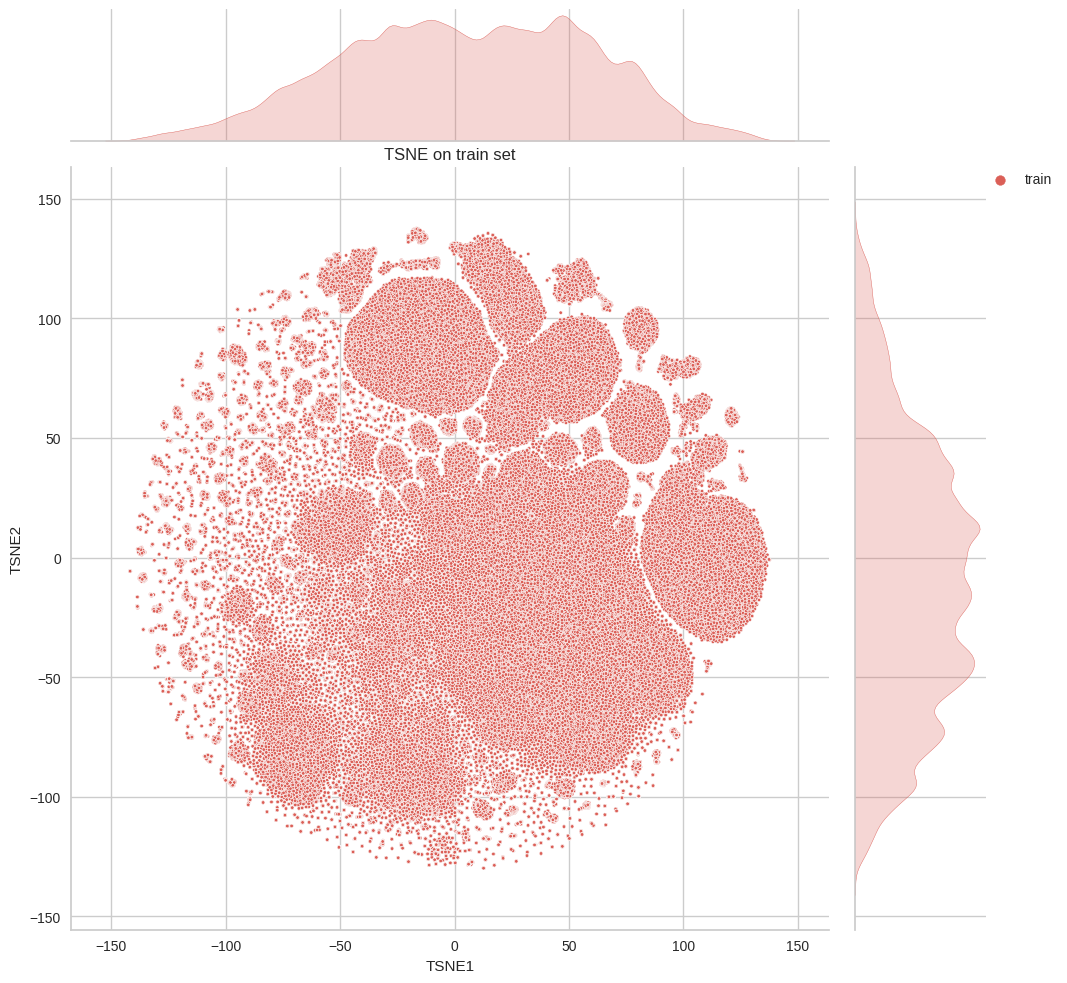

In [71]:
# Group the DataFrame based on the 'Set' column
grouped = df_tsne.groupby('set')

g = sns.jointplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='set', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('TSNE1', 'TSNE2')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.title('TSNE colored by set')
plt.show()

# Access each group separately
for group_name, group_data in grouped:
    g = sns.jointplot(data=group_data, x='TSNE1', y='TSNE2', hue='set', palette='hls', height=10, ratio=5, marker=".", s=25)
    g.set_axis_labels('TSNE1', 'TSNE2')

    # Legend outside the plot
    plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
    plt.title('TSNE on ' + group_name + ' set')
    plt.show()

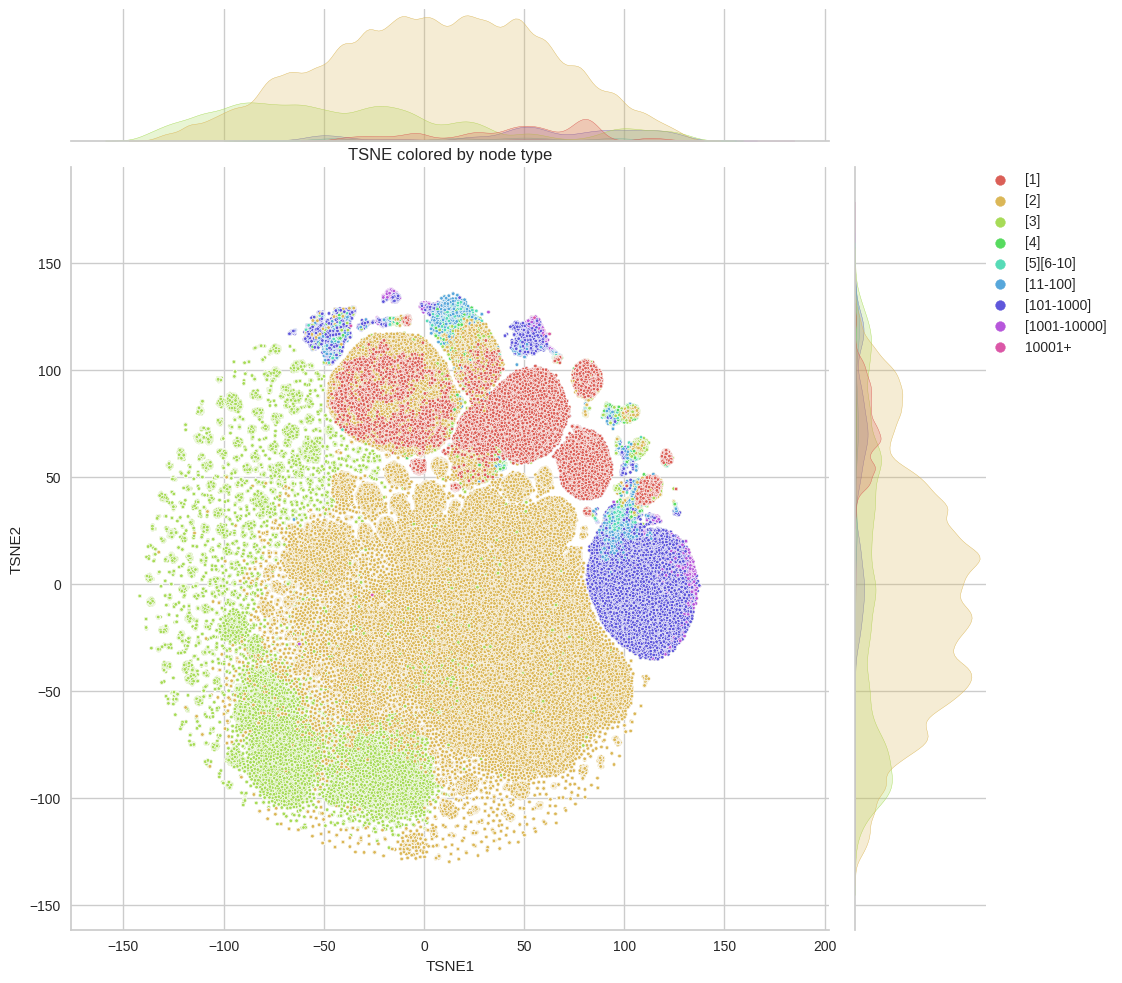

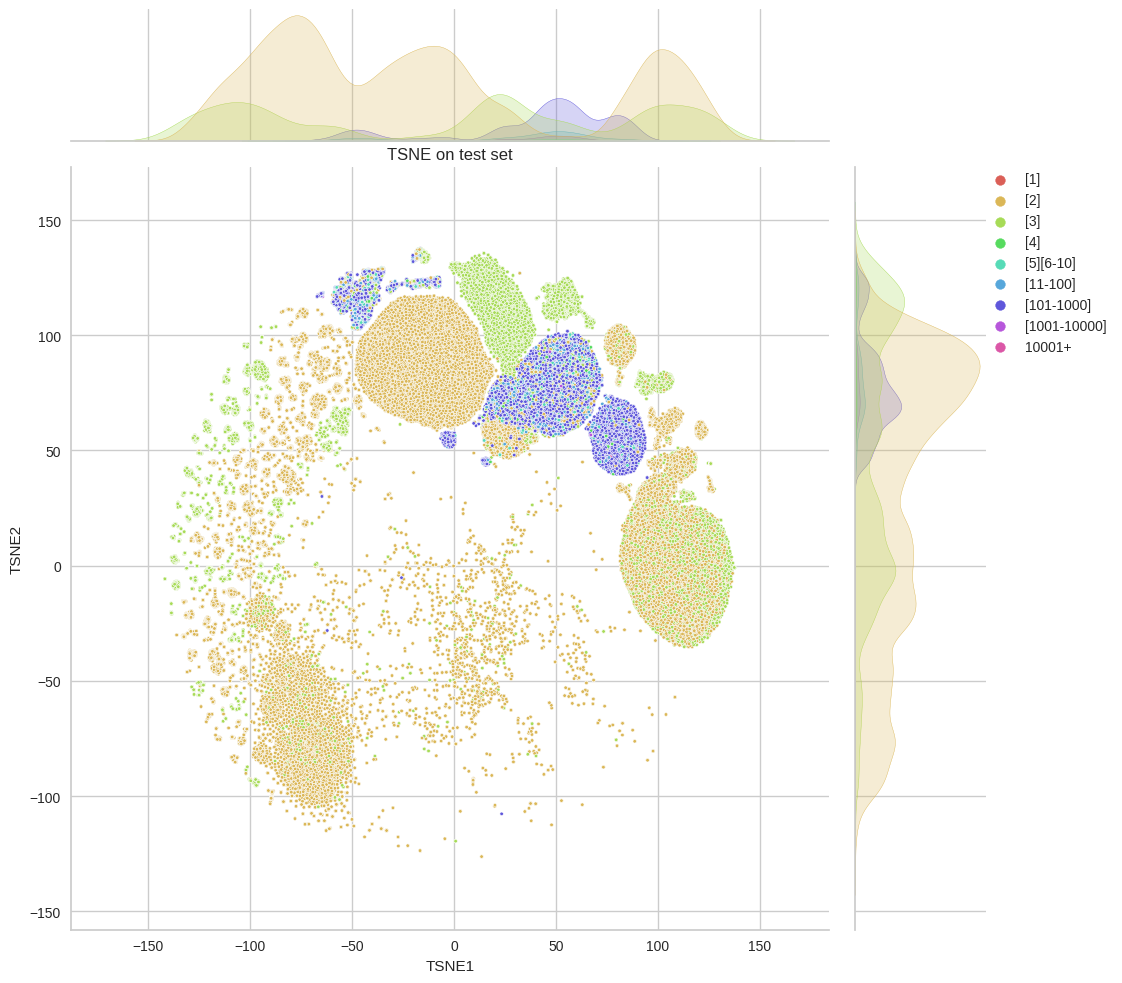

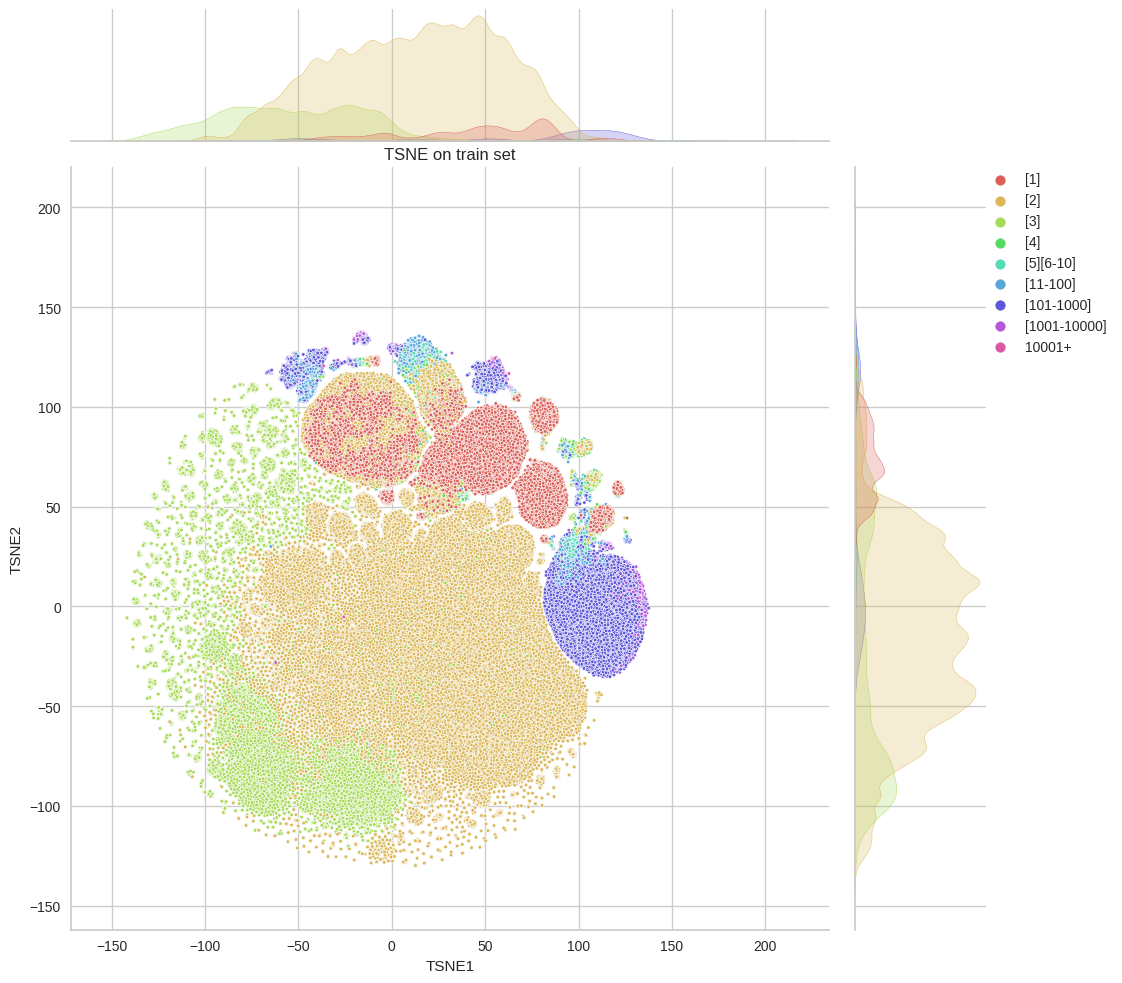

In [110]:
g = sns.jointplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='grouped_connectivity', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('TSNE1', 'TSNE2')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.title('TSNE colored by node type')
plt.show()

# Access each group separately
for group_name, group_data in grouped:
    g = sns.jointplot(data=group_data, x='TSNE1', y='TSNE2', hue='grouped_connectivity', palette='hls', height=10, ratio=5, marker=".", s=25)
    g.set_axis_labels('TSNE1', 'TSNE2')

    # Legend outside the plot
    plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
    plt.title('TSNE on ' + group_name + ' set')
    plt.show()

In [89]:
# Function to replace the column values
def replace_url(url):
    parts = url.split('-')
    if len(parts) > 1:
        url = url.replace('-' + parts[-1], '')
        if 'https' in url:
            return url
        else:
            return ''
    else:
        return '/'.join(url.split('/')[:-1])

# Create a new column with the merged string excluding the last index
df_tsne['node_type'] = df_tsne['node_type'].apply(replace_url)
df_tsne['node_type'] = df_tsne['node_type'].replace('', 'labels')
df_tsne

TSNE1       TSNE2                                         node  \
0       119.675659   18.749762  https://wormbase.org/wbdata/ortho_dis-21093   
1       -27.145353  106.760506     https://wormbase.org/wbdata/pheno-216806   
2      -130.223373   39.671459       https://wormbase.org/wbinter/000551588   
3      -101.933884  -64.669289       https://wormbase.org/wbinter/000548033   
4      -126.548851   -6.409678       https://wormbase.org/wbinter/000560112   
...            ...         ...                                          ...   
912325   46.988419   69.087296                                   21ur-10320   
912326   51.501236   75.106873                                     21ur-297   
912327   41.914524   79.754448                                    21ur-9219   
912328   70.028419   56.555977                                       ins-12   
912329   -3.200288   53.182472                                        pbo-3   

          set  connectivity                              node_type  \
0        test             2  https://wormbase.org/wbdata/ortho_dis   
1        test             2      https://wormbase.org/wbdata/pheno   
2        test             3           https://wormbase.org/wbinter   
3        test             3           https://wormbase.org/wbinter   
4        test             3           https://wormbase.org/wbinter   
...       ...           ...                                    ...   
912325  train             1                                 labels   
912326  train             1                                 labels   
912327  train             1                                 labels   
912328  train             1                                 labels   
912329  train             1                                 labels   

       grouped_connectivity  
0                     [2-5]  
1                     [2-5]  
2                     [2-5]  
3                     [2-5]  
4                     [2-5]  
...                     ...  
912325                [1-1]  
912326                [1-1]  
912327                [1-1]  
912328                [1-1]  
912329                [1-1]  

[912330 rows x 7 columns]

In [90]:
print(df_tsne['node_type'].unique())

['https://wormbase.org/wbdata/ortho_dis'
 'https://wormbase.org/wbdata/pheno' 'https://wormbase.org/wbinter'
 'https://disease' 'https://wormbase.org/species/c_elegans/gene'
 'https://wormbase.org/species/all/phenotype'
 'https://wormbase.org/wbdata/dev' 'https://wormbase.org/wbdata/dis'
 'http://semanticscience.org/resource'
 'https://wormbase.org/species/all/expr_pattern'
 'https://wormbase.org/search/life_stage' 'labels']


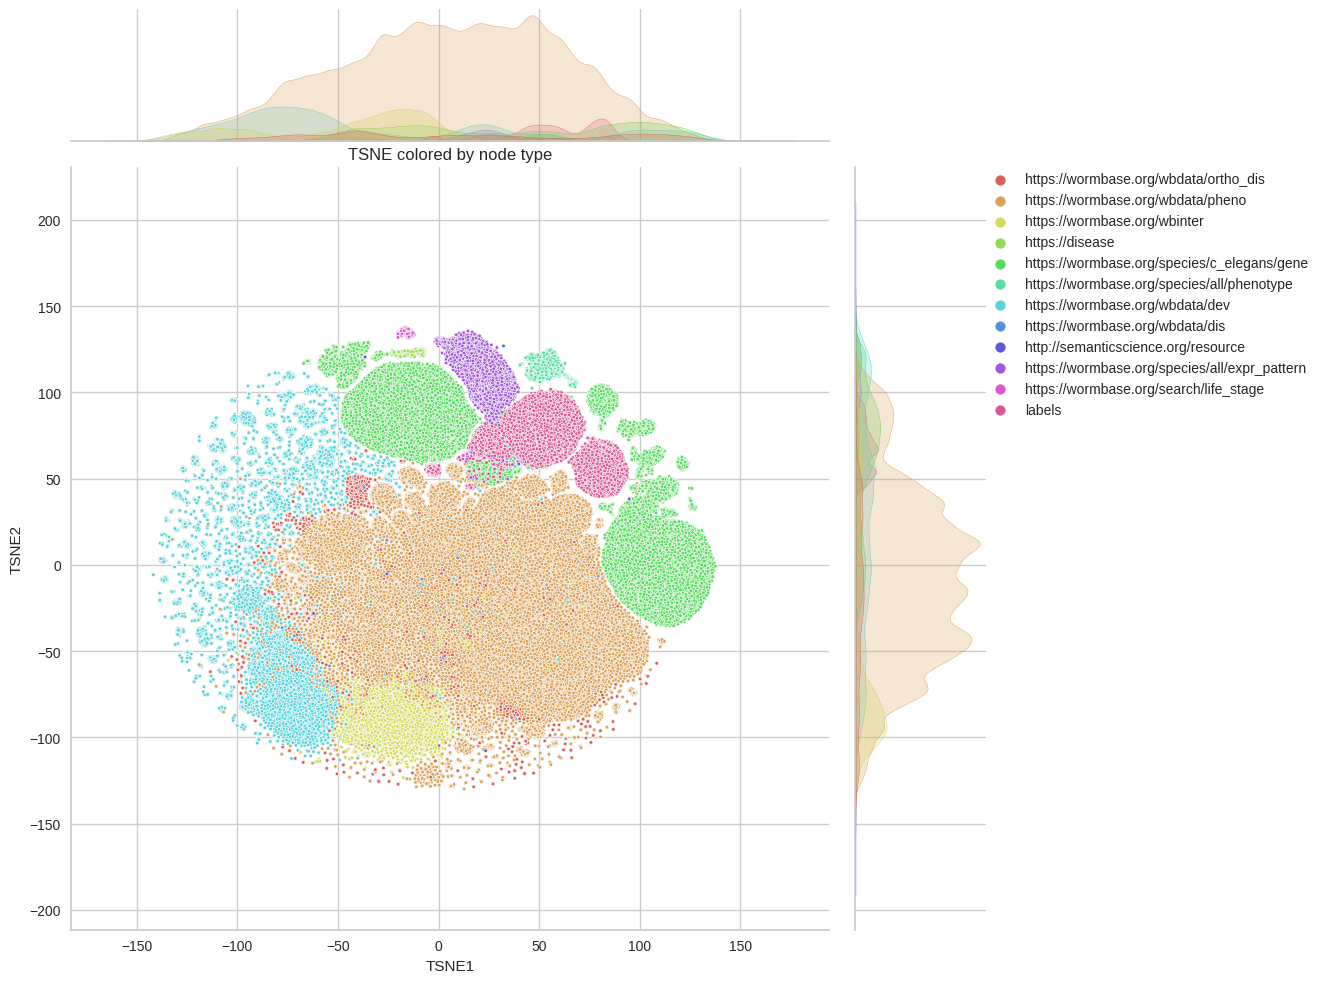

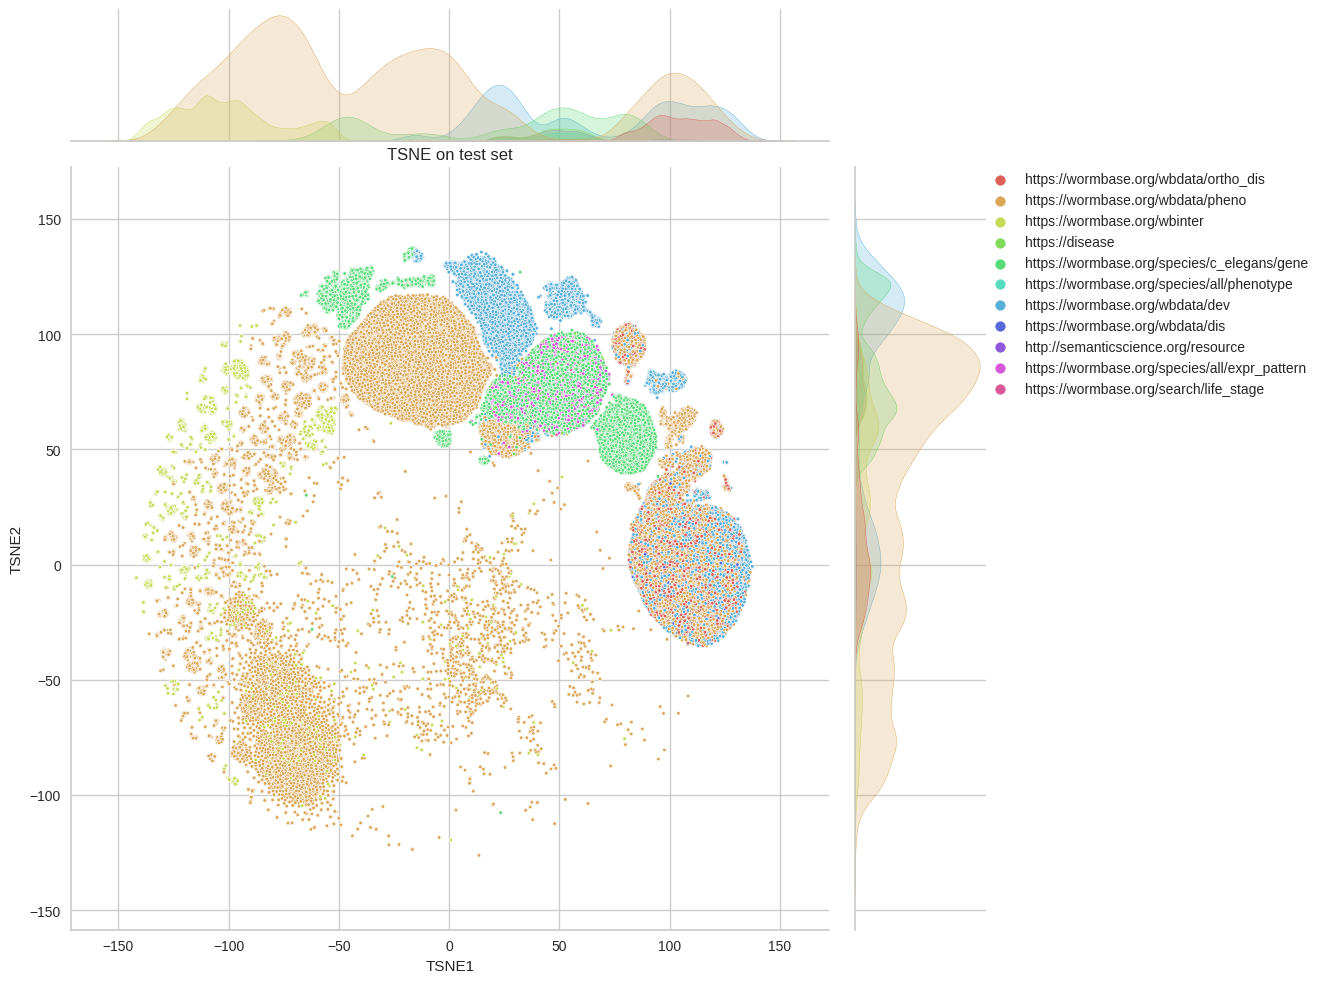

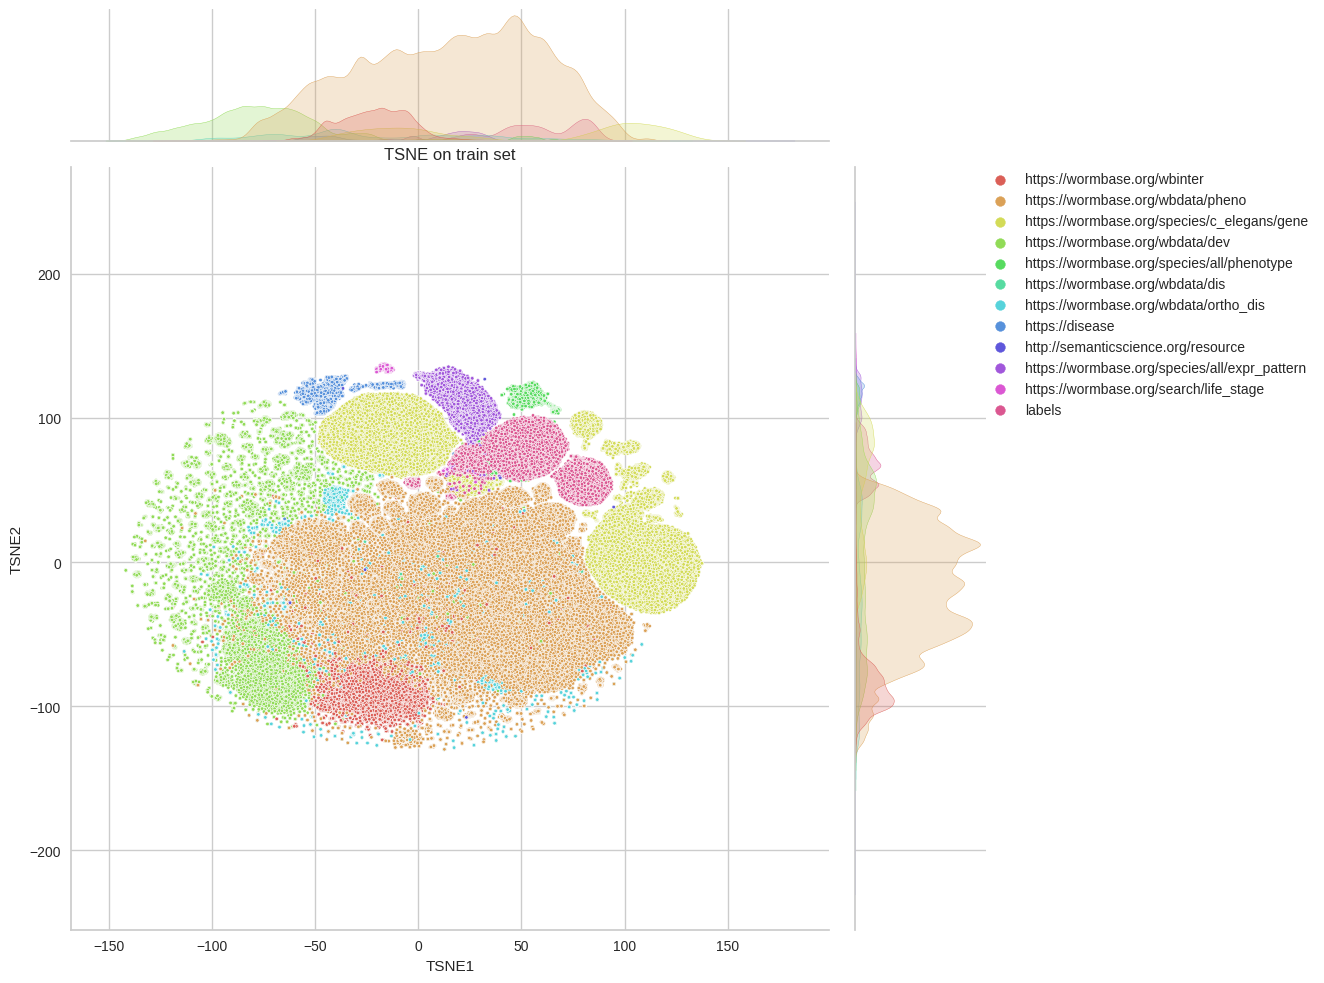

In [92]:
g = sns.jointplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='node_type', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('TSNE1', 'TSNE2')

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
plt.title('TSNE colored by node type')
plt.show()

# Access each group separately
for group_name, group_data in grouped:
    g = sns.jointplot(data=group_data, x='TSNE1', y='TSNE2', hue='node_type', palette='hls', height=10, ratio=5, marker=".", s=25)
    g.set_axis_labels('TSNE1', 'TSNE2')

    # Legend outside the plot
    plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)
    plt.title('TSNE on ' + group_name + ' set')
    plt.show()